# Distribution of Facebook shares from Emergent.info data

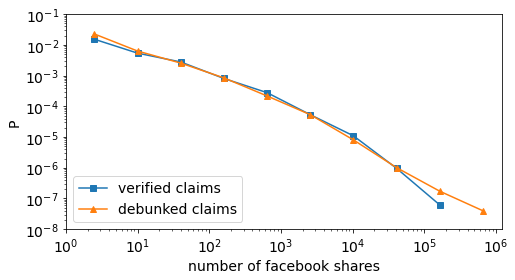

In [ ]:
import matplotlib.pyplot as plt
import csv

popularity_low = []
popularity_hi = []
p_low_q = []
p_hi_q = []
with open('Emergent_data/Q0_distr.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for row in plots:
        popularity_low.append(float(row[1]))
        p_low_q.append(float(row[2]))
with open('Emergent_data/Q1_distr.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for row in plots:
        popularity_hi.append(float(row[1]))
        p_hi_q.append(float(row[2]))

fontsize = 14
plt.subplots(figsize=plt.figaspect(0.55))
plt.plot(popularity_hi, p_hi_q, 's-', label='verified claims', )
plt.plot(popularity_low, p_low_q, '^-', label='debunked claims')
plt.xlabel('number of facebook shares', fontsize=fontsize)
plt.ylabel('P', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xscale('log')
plt.yscale('log')
plt.xlim(left=1)
plt.ylim((10**-8, 0.1))
plt.legend(fontsize=fontsize, loc='lower left')
plt.tight_layout()
#plt.show()
plt.savefig('fig_empirical_distr_fb.pdf')

# Amplification of low-credibility links by likely bots

This figure includes a superlinear fit of the data originally analyzed in https://github.com/IUNetSci/HoaxyBots/blob/master/HoaxyBotsReproduction.ipynb

Data from https://www.doi.org/10.5281/zenodo.1402266: `S8_S9_binned_claims.json`: sampled and binned tweets containing claims with bot scores for the accounts behind those tweets

In [ ]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import gridspec
from scipy.optimize import curve_fit

In [ ]:
botThres = 0.5
fn1 = "S8_S9_binned_claims.json.txt"
binnedDataClaim = json.load(open(fn1))

In [ ]:
t = botThres
xvals, yvals = list(), list()
for b in binnedDataClaim:
  nAvail = sum([1 for s in b['bot-scores']])  
  botEst = (b['nTweets']/float(b['nArticle']))*sum([1 for s in b['bot-scores'] if s > t])/nAvail
  humanEst = (b['nTweets']/float(b['nArticle']))*sum([1 for s in b['bot-scores'] if s <= t])/nAvail
  xvals.append(botEst)
  yvals.append(humanEst)

In [ ]:
# fitting power law
def linlaw(x, a, b):
  return a + x * b

# log-transform
xdata_log = np.log10(xvals)
ydata_log = np.log10(yvals)
# fit linear
popt_log, _ = curve_fit(linlaw, xdata_log, ydata_log)
intercept, slope = popt_log
# recover power law points
ydatafit_log = np.power(10, linlaw(xdata_log, *popt_log))

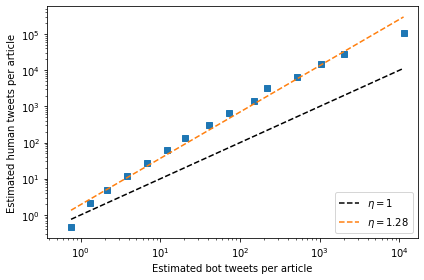

In [ ]:
# data points
plt.plot(xvals, yvals, 's')
# reference line
plt.plot([xvals[0],xvals[-1]], [xvals[0],xvals[-1]], 'k--', label="$\eta=1$")
# fit line
plt.plot(xvals, ydatafit_log, '--', label="$\eta={}$".format(round(slope,2)))

plt.xlim(xmin=xvals[0]*0.5,xmax=xvals[-1]*1.5)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Estimated human tweets per article', fontsize=10)
plt.xlabel('Estimated bot tweets per article', fontsize=10)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()